In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reactionmodel.model import Species, Reaction, Model

In [2]:
S1 = Species('S1')
S2 = Species('S2')
T  = Species('T')

In [3]:
l = 1.0
u = 1.0001
birth = Reaction([S1], [(S1, 2)], description='birth', k=l)
death = Reaction([S1], [], description='death', k=u)
m = Model([S1], [birth, death])

In [4]:
from hybrid.hybrid import HybridSimulator, FixedThresholdPartitioner

hybrid_simulator = HybridSimulator(
    k=m.get_k(jit=True),
    N=m.stoichiometry(),
    kinetic_order_matrix=m.kinetic_order(),
    partition_function=FixedThresholdPartitioner(1000).partition_function,
)

In [22]:
result = hybrid_simulator.simulate(
    (0.0, 100.0),
    [10.0],
    rng = np.random.default_rng(),
)

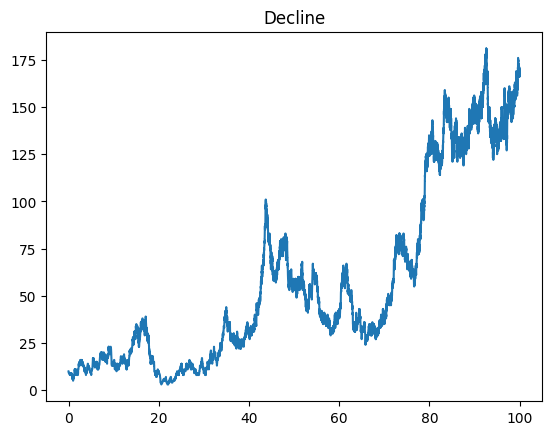

In [23]:
plt.plot(result.t_history, result.y_history[0,:].T)
plt.title("Decline")
plt.show()

# Pure Gillespie

In [12]:
from hybrid.gillespie import GillespieSimulator

g_simulator = GillespieSimulator(
    m.get_k(jit=True),
    m.stoichiometry(),
    m.kinetic_order(),
    jit=True,
)

In [16]:
result = g_simulator.simulate(
    (0.0, 100.0),
    [10.0],
    rng = np.random.default_rng(),
)

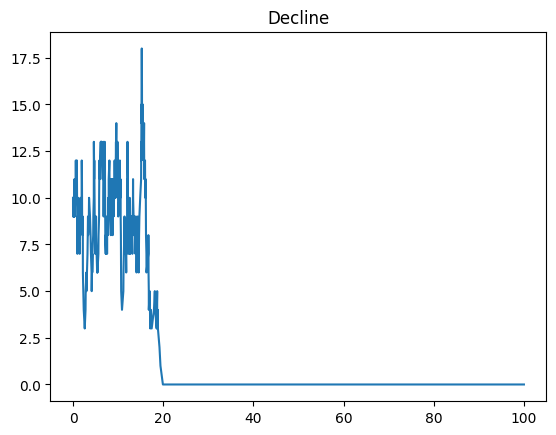

In [17]:
plt.plot(result.t_history, result.y_history[0,:].T)
plt.title("Decline")
plt.show()